# Acquisition 

This section details the simulations of the variational learning model. We begin by defining the parameters of the linguistic environment. We then define the other components of the model and simulate individual trajectories.

The linguistic environment is defined by the distribution over grammars, and their relative independent evidence.

In [1]:
# Set parameters for linguistic environment
p = 0.5  # Probability of grammar G_2
a1 = .1  # Independent evidence for G1
a2 = .5  # Independent evidence for G2
# Expected probability of G_2 in the limit
E_p = p*a2/((1-p)*a1 + p*a2)

The 

In [2]:
# Import models
import numpy as np
import random
from scipy import stats

# Create randomv variable to simulate environment
xk = np.arange(3) # There are three potential outcomes
# 1. s_0 : token is comptable with G1 only
# 2. s_1 : token is compatibile with G1 and G2
# 3. s_2 : token is compatible with G2 onle
pk = ((1-p)*a1, (1-p)*(1-a1) + p*(1-a2), p*a2)
custm = stats.rv_discrete(name='custm', values=(xk, pk))
# Run simulation for number of steps
Nturns=10000
Nagents=2000
p=np.zeros((Nturns, Nagents))
# Construct vector to hold probability
gamma=0.005 # Set learning parameter
p[0,:] = .1 * np.ones((1, Nagents))
# Generate token from environment
s_env = custm.rvs(size=Nturns)

In [3]:
for i in range(Nagents):
    #print s_env
    s_env = custm.rvs(size=Nturns)
    for n in range(1,Nturns):
        if random.random() < p[n-1, i]:
            # Learner picks G2
            if s_env[n] == 0:
                # Token is only compatible with G1
                # ---> Punish G2
                p[n, i] = (1-gamma)*p[n-1, i]
            else:
                # Token in compatbile with G2
                # ---> Reward G2
                p[n, i] = p[n-1, i] + (1 - p[n-1, i])*gamma
        else:
            # Learner picks G1
            if s_env[n] == 2:
                # Token is only compatible with G2
                # ---> Punish G1
                p[n, i] = p[n-1, i] + (1 - p[n-1, i])*gamma
            else:
                # Token is compatible with G1
                p[n, i] = (1-gamma)*p[n-1, i]

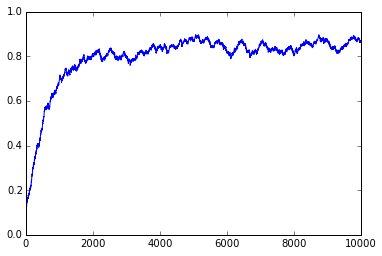

In [6]:
plt.plot(p[:,4])
plt.ylim(0,1)
plt.show()

In [7]:
final = p[-1,:]
np.arange(min(final), max(final), gamma)

array([ 0.69067061,  0.69567061,  0.70067061,  0.70567061,  0.71067061,
        0.71567061,  0.72067061,  0.72567061,  0.73067061,  0.73567061,
        0.74067061,  0.74567061,  0.75067061,  0.75567061,  0.76067061,
        0.76567061,  0.77067061,  0.77567061,  0.78067061,  0.78567061,
        0.79067061,  0.79567061,  0.80067061,  0.80567061,  0.81067061,
        0.81567061,  0.82067061,  0.82567061,  0.83067061,  0.83567061,
        0.84067061,  0.84567061,  0.85067061,  0.85567061,  0.86067061,
        0.86567061,  0.87067061,  0.87567061,  0.88067061,  0.88567061,
        0.89067061,  0.89567061,  0.90067061,  0.90567061,  0.91067061,
        0.91567061,  0.92067061,  0.92567061,  0.93067061])

In [8]:
from scipy.stats import norm

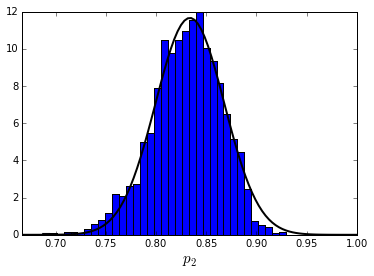

In [9]:
final = p[-1,:]
plt.hist(final, bins=35, normed=True, align='left')
xmin, xmax = plt.xlim(2*E_p-1, 1)
mu, std = norm.fit(final)
x = np.linspace(xmin, xmax, 100)
pr = norm.pdf(x, mu, std)
plt.plot(x, pr, 'k', linewidth=2)
#
plt.xlabel(r'$p_2$', fontsize=15)
plt.savefig("lrp-dist.png", format='png', dpi=1000)
plt.show()

In [10]:
p_mean = np.mean(p, axis=1)
final.mean()

0.83375415816186615

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:1282: UserWarning: findfont: Font family [u'Helvetica'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


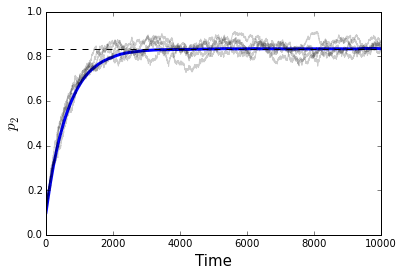

In [11]:
hfont = {'fontname':'Helvetica'}
plt.plot(p_mean, linewidth=3, color='b')
for i in range(5):
    plt.plot(p[:,i], color='k', alpha=.2)
plt.ylim(0,1)
plt.axhline(y=E_p, ls='dashed', color='k')
plt.ylabel(r"$p_2$", fontsize=15, **hfont)
plt.xlabel("Time", fontsize=15, **hfont)
plt.savefig("lrp-learning.png", format='png', dpi=1000)
plt.show()

# Dynamics

In [5]:
from sympy import symbols, diff

In [6]:
p, r, s = symbols('p r s')
lrp_diff = p*(1-p)*s/(1 - s*(1-p))

print diff(lrp_diff, p).subs(p,0)
print diff(lrp_diff, p).subs(p,1)

s/(-s + 1)
-s


The first model we want to fit is derived from Yang's (2002) variational model of syntactic learning. The form is logistic-like, where $r$ acts as the growth parameter. In reality, it represents the ratio of evidence a child learner has for two competing grammars. In this case, these are the grammars underlying the forms of negation "ne" and "ne...not".


\begin{equation}
\dot{y} = y(1-y)\frac{1 - r}{(1-y)r + y}
\end{equation}

In [97]:
def y_diff(y, t, params):
    s = params[0] # unpack parameters
    return y*(1-y)*s/(1 - s*(1-y))

We can solve this equation numerically for any initial condition $y_0$ and rate of growth $r$.

In [98]:
from scipy.integrate import odeint

In [99]:
import matplotlib.pyplot as plt
%matplotlib inline

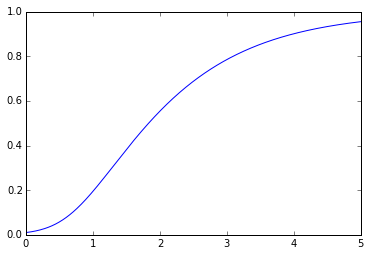

In [100]:
t = np.linspace(0, 5, num=376)
y_sol = odeint(y_diff, 0.01, t, args=([.8],))
plt.plot(t, y_sol)
plt.ylim(0,1)
plt.show()

In fact, we can vary $r$ and see the result. As $r \rightarrow 0$ the curve gets steeper and as $r \rightarrow 1$ it flattens out.

In [116]:
np.linspace(.1,1, num=5)

array([ 0.1  ,  0.325,  0.55 ,  0.775,  1.   ])

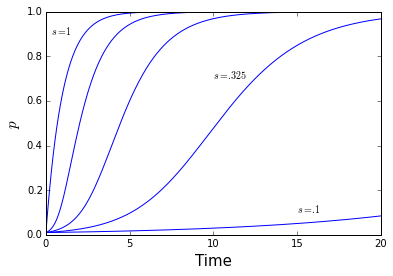

In [138]:
hfont = {'fontname':'Helvetica'}
t = np.linspace(0, 20, num=376)
for i in np.linspace(.1,1, num=5):#, endpoint=False):
    y_sol = odeint(y_diff, .01, t, args=([i],))
    plt.plot(t, y_sol, 'b')
plt.ylim(0,1)
plt.xlabel('Time', fontsize=15, **hfont)
plt.ylabel(r'$p$', fontsize=15, **hfont)
plt.text(.3, .9, r'$s=1$')
plt.text(10, .7, r'$s=.325$')
plt.text(15, .1, r'$s=.1$')
plt.savefig("lrp-gain.eps", format='eps', dpi=1000)
plt.show()

In [125]:
def log_diff(y, t, params):
    s = params[0] # unpack parameters
    return y*(1-y)*s

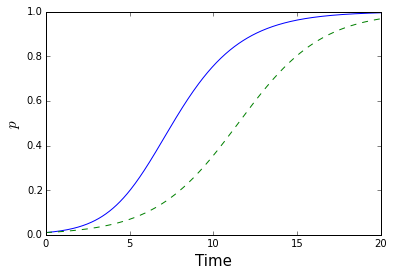

In [142]:
hfont = {'fontname':'Helvetica'}
t = np.linspace(0, 20, num=376)
s = .4
y1_sol = odeint(y_diff, .01, t, args=([s],))
y2_sol = odeint(log_diff, .01, t, args=([s],))
plt.plot(t, y1_sol)
plt.plot(t, y2_sol, 'g--')
plt.ylim(0,1)
plt.xlabel('Time', fontsize=15, **hfont)
plt.ylabel(r'$p$', fontsize=15, **hfont)
plt.savefig("lrp-log.png", format='png', dpi=1000)
plt.show()

# Modeling

Now that we have defined the differential equation and know that we can solve it, we'd like to fit it to the data we described above. We want to fit three parameters:

* $y_0$ : the initial state of the differential equation
* $r$ : the growth rate of the differentital equation
* $t$ : the time scale of the equation

While, the first two parameters have clear interpretations, the last is equally as important. Since the solution to the differential equation evolves along an arbitrary time scale. Fitting the solution to data requires a specification of how those arbitrary units map to years, months, or days. In fact, we can fit this parameter to the data along with the other ones, but we have to be careful that there aren't multiple solutions.

In [13]:
import pandas as pd
import numpy as np

In [14]:
df1 = pd.read_csv("./first_curve_data.csv")

In [15]:
def error_function1(params):
    """Find the SSE of model"""
    # Unpack the parameters
    y0 = params[0]
    s = params[1]
    #k = params[2]
    # Solve y_diff given y0, r, k
    y_sol = odeint(y_diff, y0, np.linspace(0, 75, num=376), args=([s],))
    # Get data indices
    indices = np.subtract(df1.year.unique(), min(df1.year))
    # Get count of tokens for indices
    counts = df1.groupby('year').size() #.loc[index + 1125]
    # Get count of value==1 for indices
    values = df1.groupby('year').aggregate(np.sum)
    # Initialize RSS value
    RSS = 0
    # Loop over indices
    for index in indices:
        zero_count = counts.loc[index + min(df1.year)] - values.loc[index + min(df1.year), 'value']
        one_count = values.loc[index + min(df1.year), 'value']
        #
        RSS += zero_count*(0 - y_sol[index])**2 + one_count*(1 - y_sol[index])**2
    return RSS
    

In [16]:
df2 = pd.read_csv("./second_curve_data.csv")
df2 = df2[df2.year >= 1300]

In [17]:
def error_function2(params):
    """Find the RSS of model"""
    # Unpack the parameters
    y0 = params[0]
    r = params[1]
    #k = params[2]
    # Solve y_diff given y0, r, k
    y_sol = odeint(y_diff, y0, np.linspace(0, 40, num=201), args=([r],))
    # Get data indices
    indices = np.subtract(df2.year.unique(), min(df2.year))
    # Get count of tokens for indices
    counts = df2.groupby('year').size() #.loc[index + 1125]
    # Get count of value==1 for indices
    values = df2.groupby('year').aggregate(np.sum)
    # Initialize RSS value
    RSS = 0
    # Loop over indices
    for index in indices:
        zero_count = counts.loc[index + min(df2.year)] - values.loc[index + min(df2.year), 'value']
        one_count = values.loc[index + min(df2.year), 'value']
        #
        RSS += zero_count*(0 - y_sol[index])**2 + one_count*(1 - y_sol[index])**2
    return RSS
    

We want to minimize the error function within certain bounds. That is, we want $y_0 \in [0,1]$, $r \in [0,1]$, and probably $t < 375$. We'll start off with an initial guess that roughly matches those parameters. Note that this can take a minute or two, so be patient.

In [18]:
from scipy.optimize import minimize

In [19]:
# First transition
guess = np.array([.01, .1])
bnds = ((0, 1), (0, 1))
res1 = minimize(error_function1, x0=guess, method="SLSQP", bounds=bnds)
res1

  status: 0
 success: True
    njev: 13
    nfev: 62
     fun: array([ 472.32994975])
       x: array([ 0.03137994,  0.10291529])
 message: 'Optimization terminated successfully.'
     jac: array([ 0.01625061,  0.02018738,  0.        ])
     nit: 13

In [21]:
# First transition
guess = np.array([.01, .1])
bnds = ((0, 1), (0, 1))
res1 = minimize(error_function1, x0=guess, method="COBYLA", bounds=bnds)
res1

  status: 1
    nfev: 112
   maxcv: 0.0
 success: True
     fun: 472.33364035784126
       x: array([ 0.03193982,  0.10262013])
 message: 'Optimization terminated successfully.'

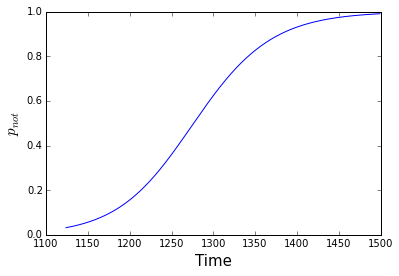

In [22]:
# Plot of fitted parametrs
y1_sol = odeint(y_diff, res1.x[0], np.linspace(0, 75, num=376), args=([res1.x[1]],))
plt.plot(range(1124,1500), y1_sol)
plt.ylim(0,1)
plt.xlim(1100, 1500)
plt.xlabel('Time', fontsize=15, **hfont)
plt.ylabel(r'$p_{not}$', fontsize=15, **hfont)
plt.savefig("lrp-first.eps", format='eps', dpi=1000)
plt.show()

In [23]:
# Second transition
guess = np.array([.01, .5])
bnds = ((0, 1), (0, 1))
res2 = minimize(error_function2, x0=guess, method="SLSQP", bounds=bnds)
res2

  status: 0
 success: True
    njev: 23
    nfev: 109
     fun: array([ 318.1133742])
       x: array([ 0.00174836,  0.34127753])
 message: 'Optimization terminated successfully.'
     jac: array([-1.45677567, -0.08760452,  0.        ])
     nit: 25

In [28]:
# Second transition
guess = np.array([.01, .1])
bnds = ((0, 1), (0, 1))
res2 = minimize(error_function2, x0=guess, method="COBYLA", bounds=bnds)
res2

  status: 1
    nfev: 867
   maxcv: 0.0
 success: True
     fun: 2168818.4800749901
       x: array([ -5.35554894e-06,   8.16376378e-01])
 message: 'Optimization terminated successfully.'

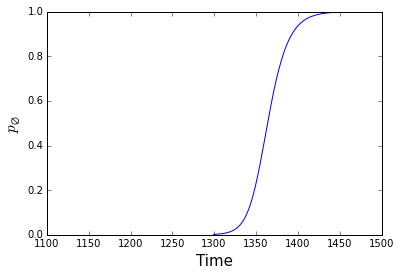

In [270]:
# Plot of fitted parametrs
y2_sol = odeint(y_diff, res2.x[0], np.linspace(0, 40, num=201), args=([res2.x[1]],))
plt.plot(range(1299,1500), y2_sol)
plt.ylim(0,1)
#plt.ylim(-.1,1.1)
plt.xlim(1100,1500)
plt.xlabel('Time', fontsize=15, **hfont)
plt.ylabel(r'$p_\varnothing$', fontsize=15, **hfont)
plt.savefig("lrp-second.eps", format='eps', dpi=1000)
plt.show()

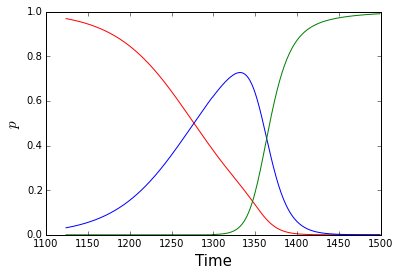

In [271]:
p_spec = y1_sol
p_head = np.append(np.zeros((376 - 201, 1)), y2_sol).reshape(376,1)

plt.plot(range(1124,1500), np.multiply((1-p_spec), (1-p_head)), 'r')
plt.plot(range(1124,1500), np.multiply(p_spec, (1-p_head)), 'b')
plt.plot(range(1124,1500), np.multiply(p_spec, p_head), 'g')
plt.xlim(1100,1500)
plt.xlabel('Time', fontsize=15, **hfont)
plt.ylabel(r'$p$', fontsize=15, **hfont)
plt.savefig("lrp-combined.eps", format='eps', dpi=1000)
plt.show()